# Tutorial: The Danger of Overfitting: Choosing the Right Degree

Kita telah melihat bahwa Regresi Polinomial adalah alat yang sangat kuat untuk memodelkan data non-linear. Dengan menaikkan `degree`, kita bisa membuat model yang semakin "fleksibel" dan cocok dengan data pelatihan kita.

Namun, fleksibilitas ini datang dengan bahaya besar: **Overfitting**.

Di notebook ini, kita akan menjelajahi apa itu overfitting, mengapa itu buruk, dan bagaimana cara mendeteksinya untuk memilih kompleksitas model yang tepat.


---
### 1. Tujuan Pembelajaran

Di akhir notebook ini, Anda akan dapat:

* Menjelaskan konsep **overfitting** dan **underfitting** secara intuitif.
* Memvisualisasikan bagaimana model yang terlalu kompleks "menghafal" noise dalam data pelatihan.
* Memahami **Bias-Variance Tradeoff** secara konseptual.
* Menggunakan **data pengujian (test set)** untuk mendeteksi overfitting dan memilih `degree` polinomial yang optimal.


---
### 2. Analogi: Belajar untuk Ujian

Bayangkan tiga siswa yang sedang belajar untuk ujian:

1.  **Siswa Underfitting:** Dia hanya membaca judul setiap bab. Dia tahu gambaran besarnya, tetapi tidak tahu detailnya sama sekali. Dia akan gagal baik pada soal latihan maupun soal ujian sungguhan.
2.  **Siswa Good Fit:** Dia belajar konsep-konsep kunci dan memahami polanya. Dia bisa mengerjakan soal latihan dengan baik dan juga bisa menerapkan pengetahuannya pada soal-soal baru di ujian sungguhan.
3.  **Siswa Overfitting:** Dia **menghafal** setiap kata dan titik koma dari 500 soal latihan, termasuk semua salah ketik di dalamnya. Dia mendapat nilai 100 sempurna pada soal latihan. Tetapi saat ujian sungguhan, soalnya sedikit berbeda, dan dia gagal total karena dia tidak pernah benar-benar *memahami* materinya.

Model *machine learning* kita bisa berperilaku persis seperti ketiga siswa ini.


---
### 3. Setup dan Visualisasi Tiga Model

Mari kita latih tiga model Regresi Polinomial pada data non-linear kita dengan kompleksitas yang berbeda:
* **Degree 1:** Model linear sederhana (Siswa Underfitting).
* **Degree 2:** Model kuadratik (Siswa Good Fit).
* **Degree 30:** Model yang sangat kompleks (Siswa Overfitting).


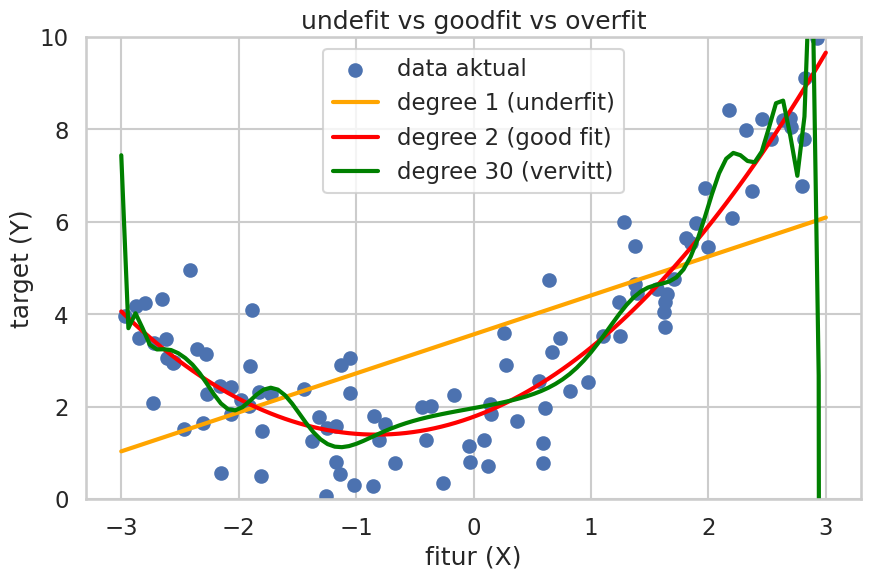

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Atur tema visual
sns.set_theme(style="whitegrid", context="talk")

# Membuat data non-linear yang sama
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
Y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

def plot_poly_model(degree, color, label):
    model = Pipeline(
        [
            ('poly_features', PolynomialFeatures(degree=degree, include_bias=True)),
            ('lin_reg', LinearRegression())
        ]
    )
    model.fit(X,Y)
    X_new = np.linspace(-3,3,100).reshape(100,1)
    Y_pred = model.predict(X_new)
    plt.plot(X_new, Y_pred, color=color, linewidth=3, label=label)

# visualisasi

plt.figure(figsize=(10,6))
plt.scatter(X,Y,label='data aktual')

plot_poly_model(1,'orange','degree 1 (underfit)')
plot_poly_model(2,'red','degree 2 (good fit)')
plot_poly_model(30,'green','degree 30 (oervitt)')

plt.legend()
plt.title("undefit vs goodfit vs overfit", fontsize=18)
plt.xlabel("fitur (X)")
plt.ylabel("target (Y)")
plt.ylim(0,10)
plt.show()

#### **Analisis Visual:**

* **Garis Oranye (Degree 1):** Jelas-jelas **underfitting**. Modelnya terlalu sederhana dan gagal menangkap pola kurva dasar.
* **Garis Merah (Degree 2):** Terlihat sangat pas. Ia menangkap tren umum dari data tanpa terlalu terpengaruh oleh noise acak. Ini adalah **good fit**.
* **Garis Hijau (Degree 30):** Ini adalah contoh sempurna dari **overfitting**. Garisnya berkelok-kelok secara liar untuk mencoba melewati setiap titik data individual. Ia telah "menghafal" noise dalam data pelatihan. Model ini akan sangat buruk dalam memprediksi data baru.


---
### 4. Mendeteksi Overfitting Secara Kuantitatif

Visualisasi di atas menggunakan seluruh data untuk pelatihan, jadi kita tidak bisa benar-benar *mengukur* seberapa buruk model yang overfitting. Cara yang benar adalah dengan menggunakan **Train-Test Split**.

**Ide:** Model yang overfitting akan memiliki **error yang sangat rendah pada data pelatihan**, tetapi **error yang sangat tinggi pada data pengujian**.

Mari kita buktikan.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 2. loop melalui berbagai derajat polinomial
train_errors = []
test_errors = []

degrees = range(1,21)

for degree in degrees:
    model = Pipeline(
        [
            ('poly_features', PolynomialFeatures(degree=degree, include_bias=True)),
            ('lin_reg', LinearRegression())
        ]
    )
    model.fit(X_train,Y_train)

    # error train
    Y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
    train_errors.append(train_rmse)

    # error test
    Y_test_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
    test_errors.append(test_rmse)

---
### 5. Menemukan "Sweet Spot": Plot Learning Curve

Sekarang kita plot error pelatihan dan pengujian terhadap kompleksitas model (derajat polinomial). Plot ini sering disebut **Learning Curve**.


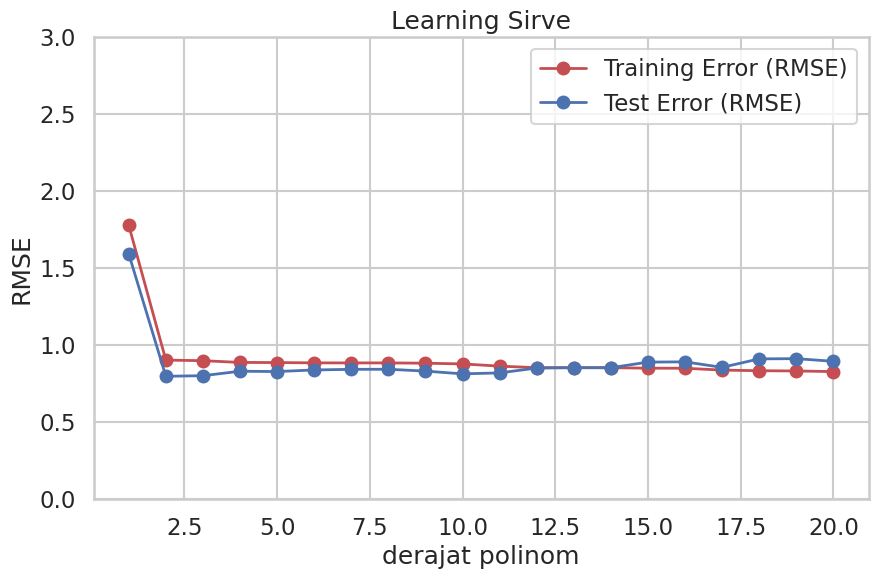

In [35]:
plt.figure(figsize=(10,6))
plt.plot(degrees, train_errors, 'r-o', linewidth=2, label="Training Error (RMSE)")
plt.plot(degrees, test_errors, 'b-o', linewidth=2, label="Test Error (RMSE)")
plt.ylim(0,3)
plt.legend()
plt.xlabel('derajat polinom')
plt.ylabel('RMSE')
plt.title('Learning Sirve')
plt.show()

#### **Analisis Learning Curve:**

* **Sisi Kiri (Derajat Rendah):** Baik error pelatihan maupun pengujian sama-sama tinggi. Ini adalah zona **underfitting**. Modelnya terlalu sederhana untuk data pelatihan dan data pengujian.
* **Sisi Kanan (Derajat Tinggi):** Perhatikan bagaimana garis merah (Training Error) terus turun hingga mendekati nol. Ini karena model yang semakin kompleks semakin mampu "menghafal" data pelatihan. Namun, garis biru (Test Error) justru **naik**. Ini adalah zona **overfitting**. Modelnya sangat buruk pada data baru.
* **"Sweet Spot" (Titik Manis):** Titik di mana **Test Error berada pada nilai minimumnya**. Dalam kasus kita, ini terjadi di sekitar **derajat 2 atau 3**. Inilah model dengan keseimbangan terbaik antara bias dan varians, yang paling mungkin berkinerja baik di dunia nyata.


---
### Kesimpulan

* **Overfitting** terjadi ketika model terlalu kompleks dan mulai mempelajari noise, bukan sinyal, dari data pelatihan.
* Model yang overfitting akan memiliki performa yang sangat baik pada data pelatihan tetapi sangat buruk pada data baru (data pengujian).
* Kita dapat mendeteksi overfitting dengan membandingkan error pada set pelatihan dan pengujian.
* **Learning curve** adalah alat visual yang sangat baik untuk memilih kompleksitas model yang optimal.

**Selanjutnya:**
Overfitting adalah masalah universal dalam machine learning. Di chapter berikutnya, kita akan belajar tentang **Regularization**, sebuah teknik untuk secara eksplisit mencegah model menjadi terlalu kompleks.
